<a href="https://colab.research.google.com/github/ecemozturkk/TensorFlow-Colab-Notes/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **14 - Creating your first tensors with TensorFlow and `tf.constant()`**

# Introduction to Tensors


In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)


2.4.1


In [ ]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar


<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for -number of dimensions-)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of our vector
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10. , 7.],
                              [3. , 2.],
                              [8. , 9.]], dtype=tf.float16) #specify the data type with dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# What's the number dimensions of another_matrix?
another_matrix.ndim
# bi ustteki kodda shape=(3,2) nin icinde iki tane deger oldugu icin bu kodda 2 sayisini elde ettik

2

In [ ]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],[4, 5, 6]],
                      [[7, 8, 9],[10, 11, 12]],
                      [[13, 14, 15],[16, 17, 18]]])
tensor
# shape(3, 2, 3) --> 3 icin 1-6,7-12,13-18 // 2 icin 1-3&1-6, 7-9&10-12, 13-15&16-18 // 3 icin her en icteki parantezin icinde 3 deger var or:1,2,3 ya da 7,8,9

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
# What's the number of dimension of tensor?
tensor.ndim

3

# What we've created so far:
* Scalar : a single number
* Vector : a number with direction (e.g. wind speed and direction)
* Matrix : a 2-dimensional array of numbers
* Tensor : an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

# **15 - Creating tensors with TensorFlow and `tf.Variable()`**

In [ ]:
import tensorflow as tf

In [ ]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [ ]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try change one of the elements in our changeable tensor
changeable_tensor[0] = 7

TypeError: ignored

In [ ]:
# How about we try `.assign()`
changeable_tensor[0].assign(7)
changeable_tensor


<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Let's try change our unchangeable tensor
unchangeable_tensor[0].assign(7)
unchangeable_tensor


AttributeError: ignored

# **16 - Creating random tensors with TensorFlow**
### Random tensors are tensors of some arbitrary size which contain random numbers

In [ ]:
import tensorflow as tf


In [ ]:
# Let's create two random (but the same) tensors 
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

# Are they equal?
random_1 , random_2 , random_1 == random_2


(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

# **17 - Shuffling the order of tensors**

In [ ]:
import tensorflow as tf


In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
not_shuffled.ndim

2

In [ ]:
not_shuffled  #shape=(3,2) oldugu icin bir ustteki dimensional sayisi 2 cikti.

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)  #every time you run it,it's a different order

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

*Burada hoca global seed ve operation seed ile alakali deneme odevi verdi.
Linkteki (https://www.tensorflow.org/api_docs/python/tf/random/set_seed)ornekleri yaptigim ayri bir not defteri (global seed vs operation seed) olusturdum*

# **18 - Creating tensors from NumPy arrays**

In [ ]:
import tensorflow as tf

In [ ]:
# 17'de tanimladigimizi tekrar tanimliyoruz
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])

In [ ]:
tf.random.shuffle(not_shuffled, seed=42) #operation random seed /// her yeniledigimizde sirasi farkli sonuc veriyor

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [ ]:
# ustune global leveli eklersek sadece ilk tanimladigimizdaki sirayi verir:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation levek random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

### Other ways to make sensors

In [ ]:
# Create a tensor of all ones
tf.ones([10, 7])


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensor of all zeroes
tf.zeros(shape=(3,4))


<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors

The main difference between NumPy and TensorFlow is that tensors can be run on a GPU (much faster for numerical computing)

In [ ]:
# You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1-25
numpy_A



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
# Let's change the shape of A (the old shape is 24, as you see up there)
A = tf.constant(numpy_A , shape=(2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [ ]:
A = tf.constant(numpy_A , shape=(2,3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

# **19 - Getting information from your tensors (tensor attributes)**
* Shape
* Rank
* axis or dimension
* Size
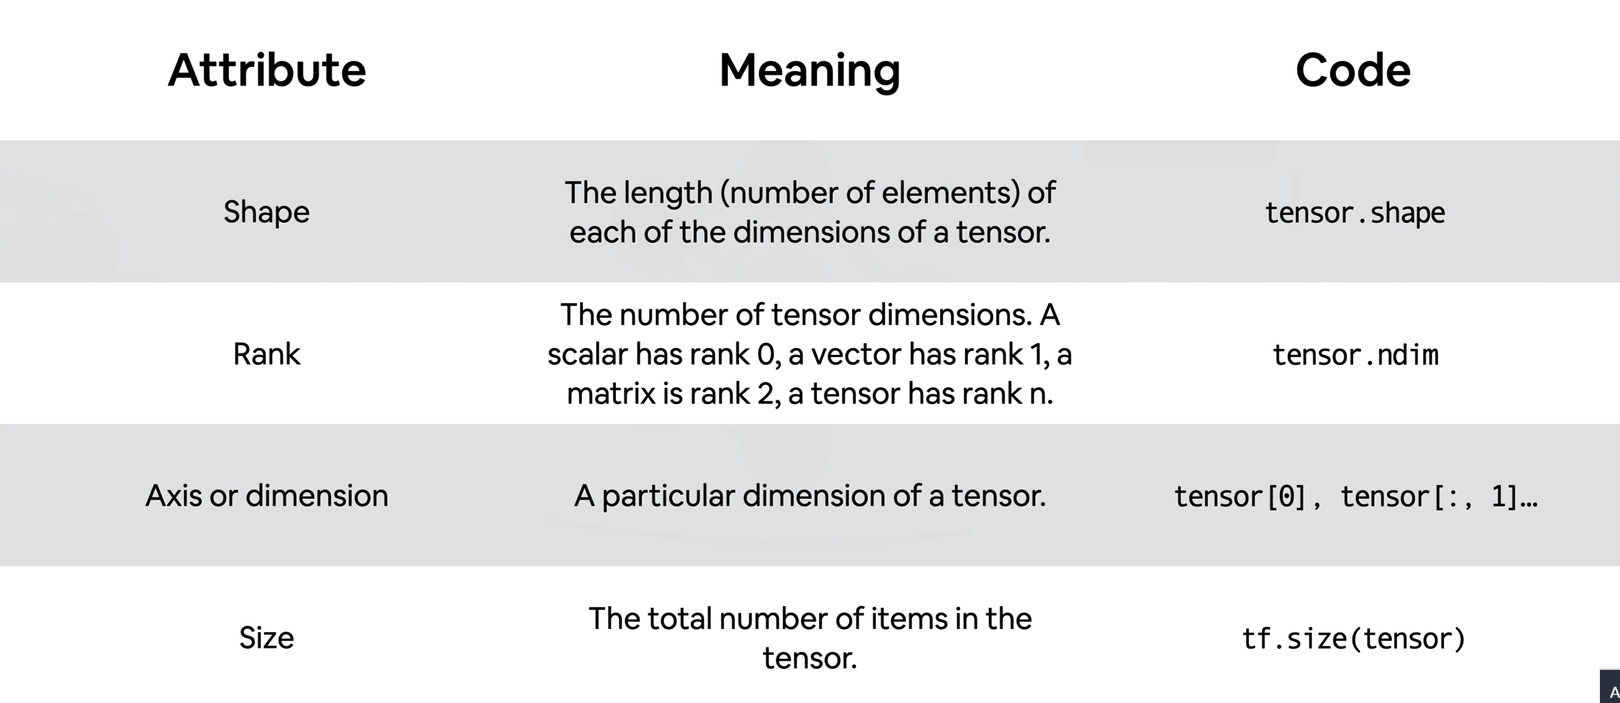

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
2*3*4*5

120

In [ ]:
# Get varaious attributes of our tensor
print("Datatype of every element:",rank_4_tensor.dtype)
print("Number of dimensions (rank)", rank_4_tensor.ndim)
print("Shape of tensor:",rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])  #//yana not aldim
print("Total number of elements in our tensor:", tf.size(rank_4_tensor))
print("Total number of elements in our tensor:", tf.size(rank_4_tensor).numpy())


Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank) 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor: 120


# **20 - Indexing and expanding tensors**
Tensors can be indexed just like Python lists

In [ ]:
some_list = [1,2,3,4]
some_list[:2]

[1, 2]

In [ ]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2,:2,:2,:2]




<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [ ]:
# Get the first element from each dimension from each index except for thne final one
rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
some_list, some_list[-1]

([1, 2, 3, 4], 4)

In [ ]:
# get the last item of each of row of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add in extra dimension to our rank 2 tensor

rank_3_tensor = rank_2_tensor[..., tf.newaxis]   #yana not aldim
rank_3_tensor, rank_2_tensor

(<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>)

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis


<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

# **21 - Manipulating tensors with basic operations**

### *Basic Operations (`+` , `-`, *, `/` )*





In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Multiplication also works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Substraction if you want
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
# we can use tensorflow built-in function too
tf.multiply(tensor , 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

# **22 - Matrix multiplication with tensors PART I**
### In machine learning, matrix  multiplication is one of the most common tensor operations.

### There are two rules our tensors (or matrices) need to fulfill if we're going to matrix multiply them:

### 1-The inner dimensions must match
### 2-The resulting matrix has the shape of the outer dimensions

In [ ]:
# Matrix multiplication in tensorflow
print(tensor)
tf.matmul(tensor,tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor, tensor

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>)

In [ ]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Create a tensor (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
# Create another (3,2) tensor
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Try to matrix multiply tensors of same shape
X @ Y


InvalidArgumentError: ignored

# **23 - Matrix multiplication with tensors PART II**

In [ ]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [ ]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
X.shape, tf.reshape(Y, shape=(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [ ]:
# Try to matrix multiply X by reshaped Y
X @ tf.reshape(Y,shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(X, tf.reshape(Y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Let's change only X shape
tf.reshape(X, shape=(2,3)).shape , Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [ ]:

tf.matmul(tf.reshape(X,shape=(2,3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
# Can do the same with transpose
X , tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [ ]:
# BU KISMI KENDIM EKLEDIM TRANSPOSE KISMINI BIRAZ DAHA KAVRAMAK ICIN
Z = tf.constant([[[ 1,  2,  3],
                  [ 4,  5,  6]],
                 [[ 7,  8,  9],
                  [10, 11, 12]]])
Z , tf.transpose(Z) 


(<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2, 2), dtype=int32, numpy=
 array([[[ 1,  7],
         [ 4, 10]],
 
        [[ 2,  8],
         [ 5, 11]],
 
        [[ 3,  9],
         [ 6, 12]]], dtype=int32)>)

In [ ]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X),Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

# **24 - Matrix Multiplication with tensors PART III**
### The dot product

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using :
* `tf.matmul()` 
* `tf.tensordot()`
* `@`

In [ ]:
X , Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check the values of Y, reshaped Y and transposed Y
print("Normal Y:")
print(Y, "\n") # "\n" is for newline

print("Y reshaped to (2,3):")
print(tf.reshape(Y,shape=(2,3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


### Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors to get satisify the matrix multiplication rules.

# **25 - Changing the datatype of tensors**

In [ ]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [ ]:
C = tf.constant([7,10])
C.dtype

tf.int32

In [ ]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
# Change from int32 to float 32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

# **26 - Tensor aggregation (finding the min, max, mean & more)**

### Aggregating tensors = cenodensing them from multiple values down to a smaller amount of values.

In [ ]:
# Get the absolute values
A = tf.constant([-7,-10])
A

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the absolute values
tf.abs(A)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [ ]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([53,  0, 74, 91, 70, 41, 94, 87, 94, 90, 75, 40, 37, 50, 20, 29, 54,
       24, 99, 79, 17, 44, 76, 72, 91, 81, 87, 90, 82, 33, 61, 72, 47, 44,
       84, 58, 63, 60, 73, 86, 64, 17, 35, 73, 58, 80, 99, 10, 31, 75])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [ ]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=61>

In [ ]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=3064>

# **27 - Tensor troubleshooting example (updating tensor datatypes)**

In [ ]:
# Find the variance of our tensor
tf.reduce_variance(E)   # WON'T WORK

AttributeError: ignored

In [ ]:
# To find the variance of our tensor, we need access to tensorflow_probability
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=661>

In [ ]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=25.713062>

In [ ]:
# Find the variance of our E tensor without probability
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=661.16156>

# **28 - Finding the positional minimum and maximum of a tensor (argmin and argmax)**

In [ ]:
# Create a new tensor for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F) #numpy=True dedigi icin esit cikmis oldu

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
# Find the minimum using the positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

# **29 - Squeezing a tensor (removing all 1-dimension axes)**

In [ ]:
# Create a tensor to get started
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
           0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256,
           0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
           0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ,
           0.13803864, 0.12217975, 0.5754491 , 0.9417181 , 0.9186585 ,
           0.59708476, 0.6109482 , 0.82086265, 0.83269787, 0.8915849 ,
           0.01377225, 0.49807465, 0.57503664, 0.6856195 , 0.75972784,
           0.908944  , 0.40900218, 0.8765154 , 0.53890026, 0.42733097,
           0.401173  , 0.66623247, 0.16348064, 0.18220246, 0.97040176,
           0.06139731, 0.53034747, 0.9869994 , 0.4746945 , 0.8646754 ]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
        0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256,
        0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
        0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ,
        0.13803864, 0.12217975, 0.5754491 , 0.9417181 , 0.9186585 ,
        0.59708476, 0.6109482 , 0.82086265, 0.83269787, 0.8915849 ,
        0.01377225, 0.49807465, 0.57503664, 0.6856195 , 0.75972784,
        0.908944  , 0.40900218, 0.8765154 , 0.53890026, 0.42733097,
        0.401173  , 0.66623247, 0.16348064, 0.18220246, 0.97040176,
        0.06139731, 0.53034747, 0.9869994 , 0.4746945 , 0.8646754 ],
       dtype=float32)>, TensorShape([50]))

# **30 - One-hot encoding tensors**

In [ ]:
# Create a list of indices
some_list = [0,1,2,3]   # could be red,green,blue,purple 

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
#Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="buraya 1 geliyor", off_value="Buraya 0 geliyor")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'buraya 1 geliyor', b'Buraya 0 geliyor', b'Buraya 0 geliyor',
        b'Buraya 0 geliyor'],
       [b'Buraya 0 geliyor', b'buraya 1 geliyor', b'Buraya 0 geliyor',
        b'Buraya 0 geliyor'],
       [b'Buraya 0 geliyor', b'Buraya 0 geliyor', b'buraya 1 geliyor',
        b'Buraya 0 geliyor'],
       [b'Buraya 0 geliyor', b'Buraya 0 geliyor', b'Buraya 0 geliyor',
        b'buraya 1 geliyor']], dtype=object)>

# **31 - Trying out more tensor math operations**

## Squaring, log, square root

In [ ]:
# Create a new tensor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# Square root
tf.sqrt(H)

InvalidArgumentError: ignored

In [ ]:
# InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
# Let's change int32 to float32
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [ ]:
# Find the log
tf.math.log(H)

InvalidArgumentError: ignored

In [ ]:
# Again, change int32 to float32
tf.math.log(tf.cast(H,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

# **32 - Exploring TensorFlow and NumPy's compatiblity**

### Note: One of the main differences between a TensorFlow and a NumPy array is that a TensorFlow tensor can be run on a GPU or TPU (for faster numerical processing).

In [ ]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3. , 7. ,10.]))
J


<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert our tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to a NumPy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3.,7.,10.]))
tensor_J = tf.constant([3.,7.,10.])
# Check the datatypes of each
numpy_J.dtype , tensor_J.dtype

(tf.float64, tf.float32)

# **33 - Making sure our tensor operations run really fast on GPUs**
## Finding access to GPUs

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Mon May 24 21:23:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Note:** If you have access to a CUDA-enabled GPU (which we have), TensorFlow will automatically use it whenever possible.